In [7]:
from utils import *
from CaptureUtils import *

In [26]:
methods = [i for i in dir(cv) if i.startswith('TM')]
methods

['TM_CCOEFF',
 'TM_CCOEFF_NORMED',
 'TM_CCORR',
 'TM_CCORR_NORMED',
 'TM_SQDIFF',
 'TM_SQDIFF_NORMED']

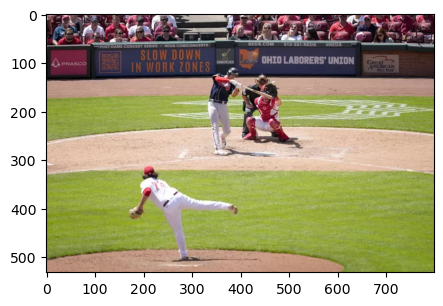

In [8]:
img = readImage('./input/base.png')
showImage(img)

In [46]:
ca = CaptureUtils(cv.cvtColor(img, cv.COLOR_RGB2BGR), 1, color=(0, 255, 255))
poses = ca.startCapture()
if not len(poses):
    raise('no target')
else:
    target_pos = poses[0]
target_pos

((164, 315), (400, 512))

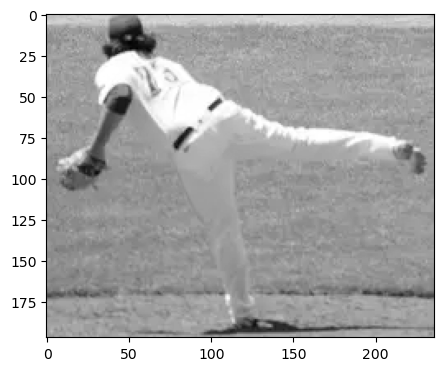

In [47]:
template = img[target_pos[0][1]:target_pos[1][1],target_pos[0][0]:target_pos[1][0]]
template = cv.cvtColor(template, cv.COLOR_RGB2GRAY)
showImage(template, cmap='gray')

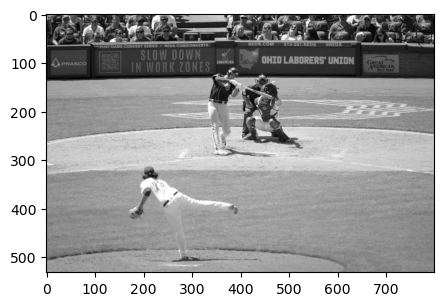

In [48]:
img_gray = cv.cvtColor(img, cv.COLOR_RGB2GRAY)
showImage(img_gray, cmap='gray')

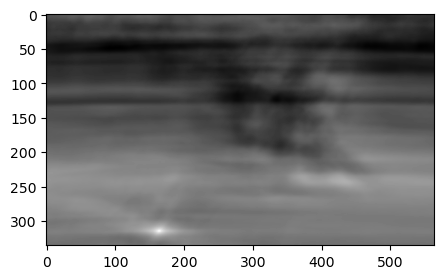

In [49]:
dest = cv.matchTemplate(img_gray, template, cv.TM_CCOEFF)
showImage(dest, cmap='gray')


In [50]:
pos = {}
_, _, pos['min'], pos['max'] = cv.minMaxLoc(dest)
pos['min'], pos['max']

((93, 49), (164, 315))

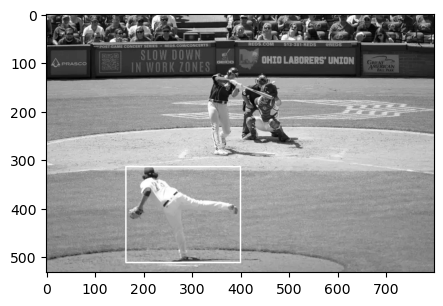

In [52]:
# img_test = np.zeros(img_gray.shape)
img_gray_tmp = img_gray.copy()
top_left = pos['max']
w, h = template.shape[::-1]
bottom_right = (top_left[0] + w, top_left[1] + h)
cv.rectangle(img_gray_tmp, top_left, bottom_right, 255, 2)
showImage(img_gray_tmp, cmap='gray')

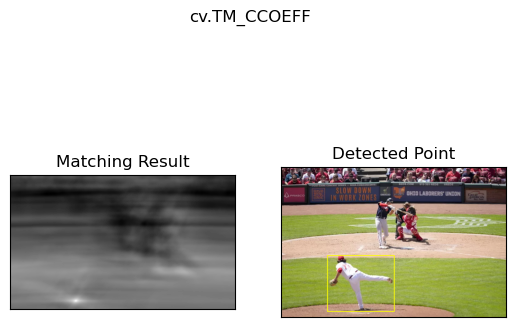

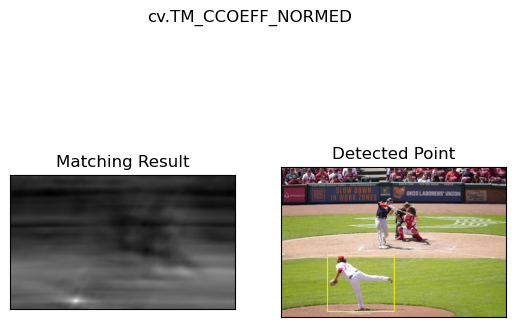

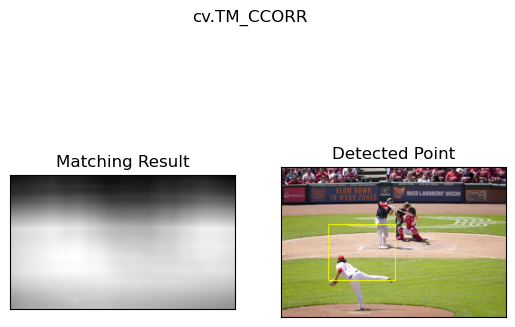

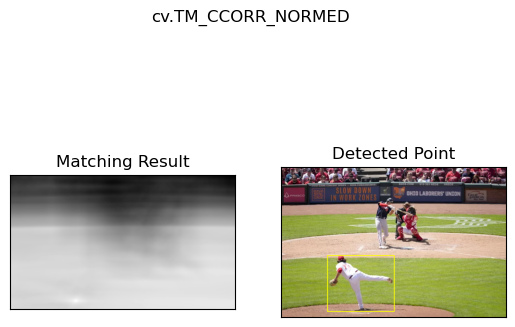

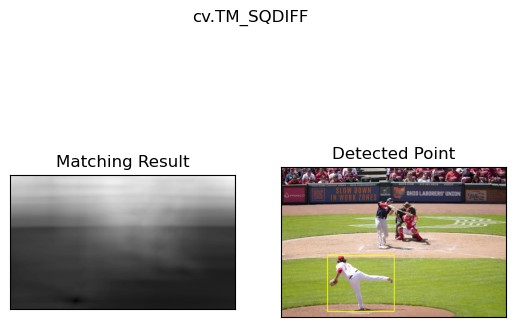

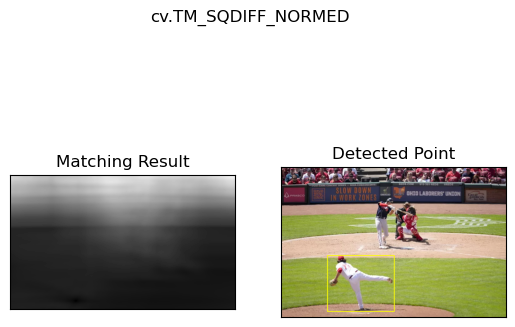

In [55]:
methods = ['cv.TM_CCOEFF', 'cv.TM_CCOEFF_NORMED', 'cv.TM_CCORR',
            'cv.TM_CCORR_NORMED', 'cv.TM_SQDIFF', 'cv.TM_SQDIFF_NORMED']
w, h = template.shape[::-1]
for meth in methods:
    img2 = img.copy()
    img2 = cv.cvtColor(img2, cv.COLOR_RGB2GRAY)
    method = eval(meth)
    # 应用模板匹配
    res = cv.matchTemplate(img2,template,method)
    min_val, max_val, min_loc, max_loc = cv.minMaxLoc(res)
    # 如果方法是TM_SQDIFF或TM_SQDIFF_NORMED，则取最小值
    if method in [cv.TM_SQDIFF, cv.TM_SQDIFF_NORMED]:
        top_left = min_loc
    else:
        top_left = max_loc
    bottom_right = (top_left[0] + w, top_left[1] + h)
    img2 = img.copy()
    cv.rectangle(img2,top_left, bottom_right, (255, 255, 0), 2)
    plt.subplot(121)
    plt.imshow(res,cmap = 'gray')
    plt.title('Matching Result'), plt.xticks([]), plt.yticks([])
    plt.subplot(122)
    plt.imshow(img2,cmap = 'gray')
    plt.title('Detected Point'), plt.xticks([]), plt.yticks([])
    plt.suptitle(meth)
    plt.show()